In [57]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage import uniform_filter # to use sliding window

18.138357147217054


(np.float64(-0.5), np.float64(1919.5), np.float64(1079.5), np.float64(-0.5))

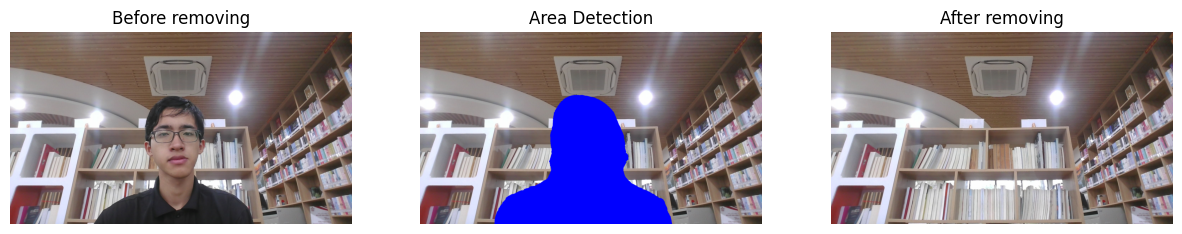

In [ ]:
path1 = os.path.join('data/1VLT.jpg')
path0 = os.path.join('data/0VLT.jpg')
img1 = plt.imread(path1)
img0 = plt.imread(path0)

H, W, C = img1.shape
window_size = 200

diff = np.abs(img1 - img0)
squared_diff = diff ** 2
squared_sum = np.sum(squared_diff, axis = -1)

wd = uniform_filter(squared_sum, size = window_size) # hay, sliding window doan nay
sum_euclid_distances = np.sqrt(wd)
# also phai dung numpy vi numpy no sieu optimized roi, chu neu dung for loop thi chay cuc cham


sum_euclid_distances = sum_euclid_distances.reshape((H, W, -1))
print(sum_euclid_distances.max())
mask = np.any(sum_euclid_distances > 13, axis = -1) # axis = -1 is very different to no axis. no axis = consider an entire array, axis = -1 consider the last dimension and 
#vd shape (H, W, 3) axis = -1 thi consider (H, W), con (H, W, 3) xong axis = -2 thi check (H, 3)
# consider np.all hoac np.any
# remember ko ghi axis = ?? thi no consider all chieu`, co ghi chieu nao thi no consider moi chieu do va lam mat cac chieu do
img3 = img1.copy()
fig, ax = plt.subplots(ncols = 3, figsize = (15, 5), sharex = True, sharey = True)

ax[0].imshow(img3)
ax[0].axis('off')
ax[0].set(title = 'Before removing')

img3[mask] = np.array([0, 0, 255])
ax[1].imshow(img3)
ax[1].set(title = 'Area Detection')
ax[1].axis('off')

img3[mask] = img0[mask]
ax[2].imshow(img3)
ax[2].set(title = 'After removing')
ax[2].axis('off')